In [29]:
# vs code写代码时候执行
import sys, os
sys.path.append("..")  # 跳到上级目录下面（sys.path添加目录时注意是在windows还是在Linux下，windows下需要‘\\'否则会出错。）
colab_path = "."
if os.path.exists(colab_path):
    sys.path.append(colab_path)

In [30]:
# 如果你的Notebook运行时不能实时反应import的.py文件的代码变化
# 特别是当你同时在.py文件里写写改改然后在Notebook里尝试运行它的时候

# 在Notebook里添加自动重新加载
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans, AgglomerativeClustering
from skfuzzy.cluster import cmeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score #轮廓系数
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib

In [32]:
plt.style.use(['science', 'grid', 'no-latex'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1

# 设置保存图片的格式和dpi
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['savefig.format'] = 'svg'

In [33]:
df = pd.read_excel("./数据.xlsx", sheet_name=1, index_col=0).T

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,391.836735,373.469388,361.224490,348.979592,340.816327,322.448980,310.204082,310.204082,316.326531,300.000000,...,304.081633,295.918367,295.918367,304.081633,314.285714,316.326531,328.571429,338.775510,353.061224,363.265306
2,418.309510,376.293088,360.343365,376.046703,343.393146,337.784888,340.467818,312.549450,321.881455,302.268219,...,318.543977,321.829195,301.114909,312.462344,313.519086,331.371251,350.769954,351.500165,380.444910,380.542469
3,417.353714,390.320871,388.360200,361.236263,369.827109,333.773857,330.405023,314.894819,314.783318,304.536437,...,329.965504,324.066554,306.311451,311.720606,325.323886,343.252706,333.539907,337.122779,386.644922,376.023713
4,392.887713,389.409877,394.703565,353.405416,372.403928,345.885276,335.852433,320.342229,320.338242,297.804656,...,301.856420,305.589626,308.548810,326.182950,327.700115,339.317834,342.595575,343.071924,350.477588,382.402916
5,419.360489,381.029496,379.373461,370.003139,340.899115,322.527307,310.279434,307.177394,322.729901,303.072874,...,301.114682,313.745352,301.908617,331.522845,323.790630,322.729901,351.651243,362.572089,381.391886,381.516813


### <font color=red><font face="楷体">聚类方法对比

In [35]:
from sklearn.decomposition import PCA
import copy

In [37]:
copyResult = copy.deepcopy(df)
copyResult.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,391.836735,373.469388,361.224490,348.979592,340.816327,322.448980,310.204082,310.204082,316.326531,300.000000,...,304.081633,295.918367,295.918367,304.081633,314.285714,316.326531,328.571429,338.775510,353.061224,363.265306
2,418.309510,376.293088,360.343365,376.046703,343.393146,337.784888,340.467818,312.549450,321.881455,302.268219,...,318.543977,321.829195,301.114909,312.462344,313.519086,331.371251,350.769954,351.500165,380.444910,380.542469
3,417.353714,390.320871,388.360200,361.236263,369.827109,333.773857,330.405023,314.894819,314.783318,304.536437,...,329.965504,324.066554,306.311451,311.720606,325.323886,343.252706,333.539907,337.122779,386.644922,376.023713
4,392.887713,389.409877,394.703565,353.405416,372.403928,345.885276,335.852433,320.342229,320.338242,297.804656,...,301.856420,305.589626,308.548810,326.182950,327.700115,339.317834,342.595575,343.071924,350.477588,382.402916
5,419.360489,381.029496,379.373461,370.003139,340.899115,322.527307,310.279434,307.177394,322.729901,303.072874,...,301.114682,313.745352,301.908617,331.522845,323.790630,322.729901,351.651243,362.572089,381.391886,381.516813


In [38]:
# 数据归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(copyResult) #fit，在这里本质是生成min(x)和max(x)
MinMaxScaler_features = scaler.transform(copyResult) #通过接口导出结果

MinMaxScaler_features

array([[0.37826995, 0.39554223, 0.34485229, 0.46747493, 0.43286267,
        0.49322517, 0.41178987, 0.2949105 , 0.39894185, 0.49152813,
        0.38882631, 0.44265311, 0.40902924, 0.43942161, 0.37346351,
        0.38097751, 0.4598784 , 0.38335988, 0.52316945, 0.32757659,
        0.48417046, 0.47448134, 0.3799974 , 0.46760125],
       [0.85666167, 0.44907909, 0.32760968, 0.99833738, 0.47912799,
        0.82484123, 1.        , 0.36114564, 0.53008319, 0.55012556,
        0.65027479, 0.62789119, 0.64010526, 0.42426914, 0.72353426,
        0.950797  , 0.60444968, 0.57168548, 0.50304755, 0.70328618,
        0.94658817, 0.75548995, 0.885539  , 0.90382476],
       [0.8393894 , 0.71504339, 0.8758675 , 0.70786286, 0.95373468,
        0.7381087 , 0.80441815, 0.42738079, 0.3625095 , 0.60872298,
        0.56368892, 0.74591839, 0.6196538 , 0.7197108 , 1.        ,
        1.        , 0.74902095, 0.55501766, 0.8128914 , 1.        ,
        0.58766889, 0.43798277, 1.        , 0.78973268],
       [0.397

In [39]:
pca = PCA(n_components=0.85,svd_solver="full") #实例化
pca = pca.fit(MinMaxScaler_features) #拟合模型
PCA_behavior_features = pca.transform(MinMaxScaler_features)

PCA_behavior_features.shape

(30, 11)

In [40]:
pca.explained_variance_ratio_.sum()

0.8669907713709137

In [41]:
pca.explained_variance_ratio_

array([0.30404591, 0.08727807, 0.08287501, 0.07475538, 0.06363099,
       0.05173274, 0.05052888, 0.04594809, 0.03830023, 0.03775668,
       0.03013879])

In [42]:
pca.explained_variance_

array([0.48853277, 0.14023605, 0.13316133, 0.12011493, 0.10224056,
       0.08312277, 0.08118844, 0.07382815, 0.06153977, 0.06066641,
       0.0484262 ])

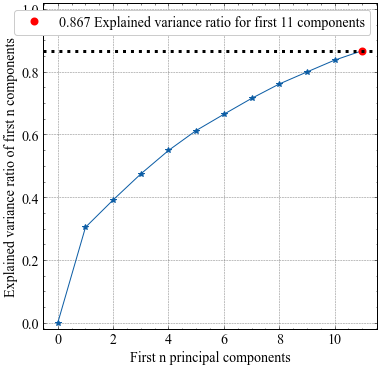

In [43]:
# 绘图
skplt.decomposition.plot_pca_component_variance(pca,target_explained_variance=0.85,figsize=(6,6)
                                                ,title=None)
plt.savefig('./run/sheet2/figure/PCA累积贡献率',bbox_inches='tight')
plt.show()

In [44]:
CH_Score = []
Sil_Score = []
DBS_Score = []
for coef in range(2,9):
    # 追加CH分数Calinski Harabasz Score
    Sil_Score.append([coef
                    ,silhouette_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,silhouette_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    # ,davies_bouldin_score()
                    ])

    # 追加轮廓系数
    CH_Score.append([coef
                    ,calinski_harabasz_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,calinski_harabasz_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    ])

    # 追加DBS系数
    DBS_Score.append([coef
                    ,davies_bouldin_score(PCA_behavior_features, KMeans(n_clusters=coef,random_state=10).fit(PCA_behavior_features).labels_)
                    ,davies_bouldin_score(PCA_behavior_features, SpectralClustering(n_clusters=coef, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features))
                    ])

CH_Score = pd.DataFrame(CH_Score,columns=['n_clusters','K-Means++','SpectralClustering'])
Sil_Score = pd.DataFrame(Sil_Score,columns=['n_clusters','K-Means++','SpectralClustering'])
DBS_Score = pd.DataFrame(DBS_Score,columns=['n_clusters','K-Means++','SpectralClustering'])

In [45]:
CH_Score

,n_clusters,K-Means++,SpectralClustering
0,2,10.732483,10.732483
1,3,7.948457,7.822685
2,4,6.600644,6.677951
3,5,5.506938,5.563675
4,6,5.188344,4.882983
5,7,4.641915,4.757340
6,8,4.489420,4.735654


In [46]:
Sil_Score

,n_clusters,K-Means++,SpectralClustering
0,2,0.213203,0.213203
1,3,0.162292,0.152485
2,4,0.142885,0.157535
3,5,0.138028,0.130464
4,6,0.135396,0.124813
5,7,0.112368,0.142787
6,8,0.116650,0.146630


In [47]:
DBS_Score

,n_clusters,K-Means++,SpectralClustering
0,2,1.574623,1.574623
1,3,1.683975,1.710748
2,4,1.827659,1.571436
3,5,1.600370,1.571830
4,6,1.625312,1.518212
5,7,1.574026,1.511462
6,8,1.298658,1.399991


In [48]:
# 导出数据到本地
CH_Score.to_csv('./run/sheet2/data/CH_Score.csv', index=False, encoding='utf_8_sig')
Sil_Score.to_csv('./run/sheet2/data/Sil_Score.csv', index=False, encoding='utf_8_sig')
DBS_Score.to_csv('./run/sheet2/data/DBS_Score.csv', index=False, encoding='utf_8_sig')

In [49]:
# 重新导入数据
CH_Score = pd.read_csv('./run/sheet2/data/CH_Score.csv')
Sil_Score = pd.read_csv('./run/sheet2/data/Sil_Score.csv')
DBS_Score = pd.read_csv('./run/sheet2/data/DBS_Score.csv')

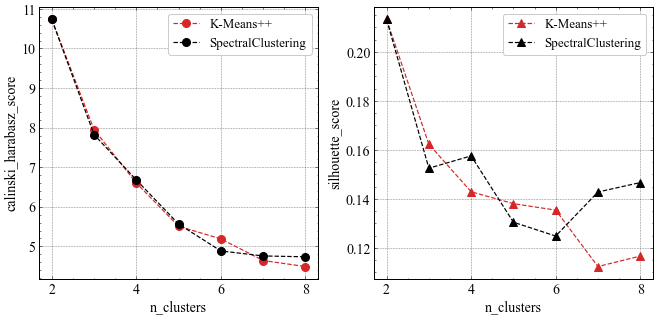

In [50]:
COLOR_LIST = ['tab:red', 'black', "tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:brown", "tab:pink","tab:gray", "tab:olive", "tab:cyan", "royalblue"]
# 绘制聚类效果对比曲线
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(11,5)) #设定画布
for idx, it in enumerate(['K-Means++', 'SpectralClustering']):
    ax1.plot(CH_Score['n_clusters'],CH_Score[it],lw=1.2,marker='o',ms=8,label=it,ls='--',color=COLOR_LIST[idx]) #绘制每一条曲线
    ax2.plot(Sil_Score['n_clusters'],Sil_Score[it],lw=1.2,marker='^',ms=8,label=it,ls='--',color=COLOR_LIST[idx])

ax1.set_xlabel('n_clusters')
ax1.set_ylabel('calinski_harabasz_score')
ax1.legend(fontsize=13, frameon=True, loc='best')

ax2.set_xlabel('n_clusters')
ax2.set_ylabel('silhouette_score')
ax2.legend(fontsize=13, frameon=True, loc='best')  #  ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’


# ax1.set_xticks([2,3,4,5], [2,3,4,5])
# ax2.set_xticks([2,3,4,5], [2,3,4,5])

plt.savefig('./run/sheet2/figure/不同聚类方法的轮廓系数值对比', bbox_inches='tight')
plt.show()

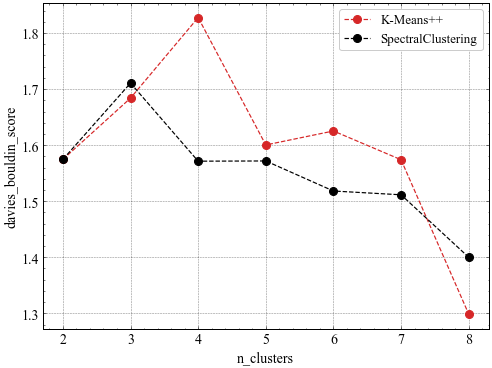

In [66]:
# 绘制聚类效果对比曲线
fig, ax = plt.subplots(1,1,figsize=(8,6)) #设定画布
for idx, it in enumerate(['K-Means++', 'SpectralClustering']):
    ax.plot(DBS_Score['n_clusters'],DBS_Score[it],lw=1.2,marker='o',ms=8,label=it,ls='--',color=COLOR_LIST[idx]) #绘制每一条曲线

ax.set_xlabel('n_clusters')
ax.set_ylabel('davies_bouldin_score')
ax.legend(fontsize=13, frameon=True, loc='best')

# ax1.set_xticks([2,3,4,5], [2,3,4,5])
# ax2.set_xticks([2,3,4,5], [2,3,4,5])

plt.savefig('./run/sheet2/figure/不同聚类方法的轮廓系数值对比-', bbox_inches='tight')
plt.show()

### <font color=red><font face="楷体">重点研究谱聚类

In [52]:
# 调用scikitplot绘图
def plot_silhouette_of_various_clusters(num_li):
    for i in num_li:
        skplt.metrics.plot_silhouette(PCA_behavior_features,
        SpectralClustering(n_clusters=i, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features),
        figsize=(6,6),title=None)
        plt.xlim(-0.1, 0.5)
        plt.savefig('./run/sheet2/figure/谱聚类聚类为{}簇时各样本的轮廓系数值'.format(i), bbox_inches='tight')
        plt.show()

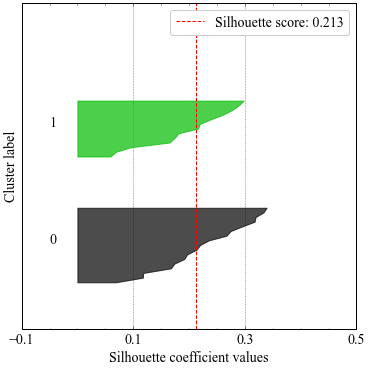

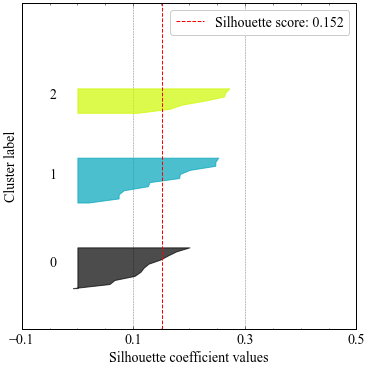

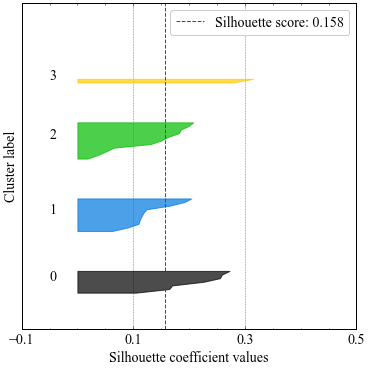

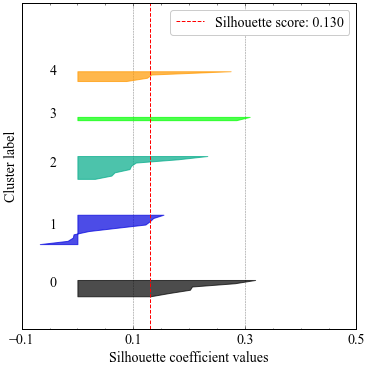

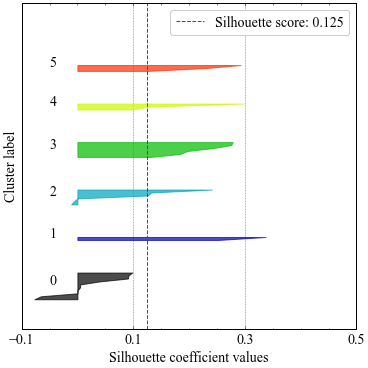

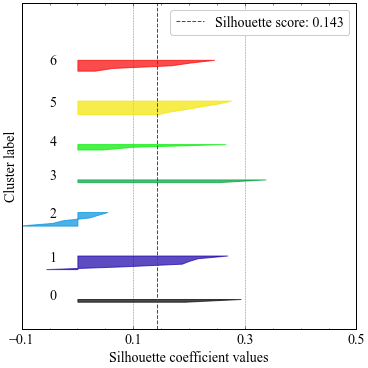

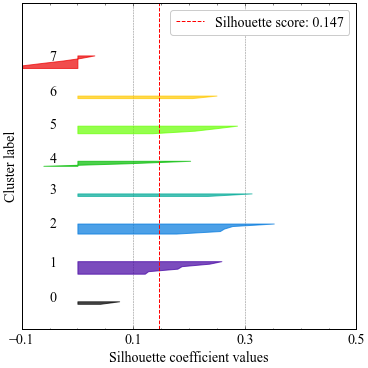

In [53]:
plot_silhouette_of_various_clusters([*range(2, 9)])

### <font color=red><font face="楷体">将聚类后的结果确定为每条数据的label

In [54]:
clusterer = SpectralClustering(n_clusters=4, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features)

pd.Series(clusterer).value_counts() / clusterer.shape[0]

2    0.366667
1    0.333333
0    0.233333
3    0.066667
dtype: float64

In [55]:
clusterer

array([2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 3, 2, 3])

In [56]:
df_add_label = pd.concat([df, pd.DataFrame([*clusterer],columns=['Cluster'])],axis=1)
df_add_label.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,391.836735,373.469388,361.224490,348.979592,340.816327,322.448980,310.204082,310.204082,316.326531,300.000000,...,295.918367,295.918367,304.081633,314.285714,316.326531,328.571429,338.775510,353.061224,363.265306,0.0
2,418.309510,376.293088,360.343365,376.046703,343.393146,337.784888,340.467818,312.549450,321.881455,302.268219,...,321.829195,301.114909,312.462344,313.519086,331.371251,350.769954,351.500165,380.444910,380.542469,0.0
3,417.353714,390.320871,388.360200,361.236263,369.827109,333.773857,330.405023,314.894819,314.783318,304.536437,...,324.066554,306.311451,311.720606,325.323886,343.252706,333.539907,337.122779,386.644922,376.023713,0.0
4,392.887713,389.409877,394.703565,353.405416,372.403928,345.885276,335.852433,320.342229,320.338242,297.804656,...,305.589626,308.548810,326.182950,327.700115,339.317834,342.595575,343.071924,350.477588,382.402916,0.0


In [57]:
df_add_label.to_csv('./run/sheet2/data/df_add_label.csv', index=False, encoding='utf_8_sig')

In [67]:
def get_ratio(input_n_clusters):
    clusterer = SpectralClustering(n_clusters=input_n_clusters, random_state=0, affinity='rbf').fit_predict(PCA_behavior_features)
    print(f"聚类为{input_n_clusters}类")
    print(pd.Series(clusterer).value_counts() / clusterer.shape[0])
    df_add_label = pd.concat([pd.DataFrame(PCA_behavior_features), pd.DataFrame([*clusterer],columns=['Cluster'])],axis=1)
    fig, ax = plt.subplots(1,1,figsize=(8,6)) #设定画布
    for label, temp_df in df_add_label.groupby('Cluster'):
        # print(temp_df)
        ax.scatter(temp_df.loc[:,0], temp_df.loc[:,1], color=COLOR_LIST[int(label)], s=70)
        # ax.plot(DBS_Score['n_clusters'],DBS_Score[it],lw=1.2,marker='o',ms=8,label=it,ls='--',color=COLOR_LIST[idx]) #绘制每一条曲线

    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    # ax.legend(fontsize=13, frameon=True, loc='best')

    # ax1.set_xticks([2,3,4,5], [2,3,4,5])
    # ax2.set_xticks([2,3,4,5], [2,3,4,5])

    plt.savefig(f'./run/sheet2/figure/聚类为{input_n_clusters}簇下的散点分布图', bbox_inches='tight')
    plt.show()


聚类为2类
0    0.566667
1    0.433333
dtype: float64


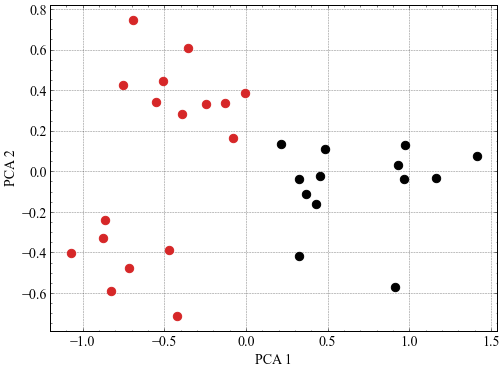

聚类为3类
1    0.400000
0    0.366667
2    0.233333
dtype: float64


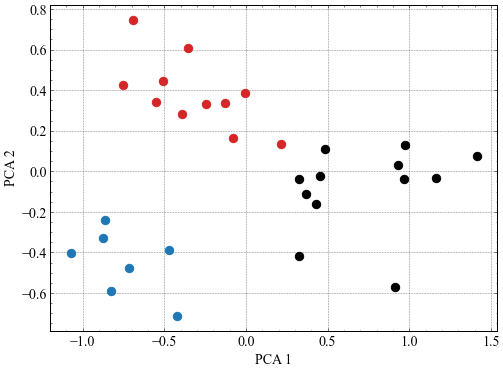

聚类为4类
2    0.366667
1    0.333333
0    0.233333
3    0.066667
dtype: float64


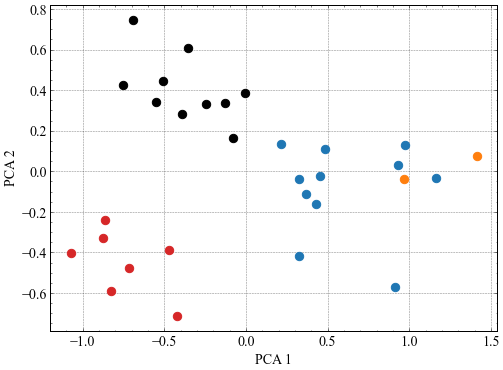

聚类为5类
1    0.333333
2    0.266667
0    0.200000
4    0.133333
3    0.066667
dtype: float64


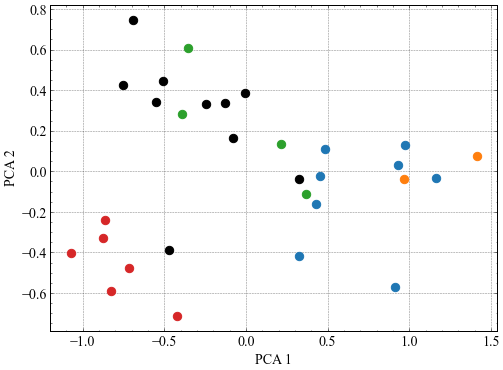

聚类为6类
0    0.333333
3    0.200000
2    0.200000
5    0.100000
4    0.100000
1    0.066667
dtype: float64


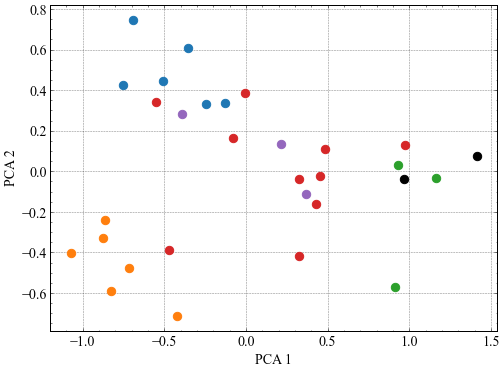

聚类为7类
5    0.200000
2    0.200000
1    0.200000
6    0.166667
4    0.100000
3    0.066667
0    0.066667
dtype: float64


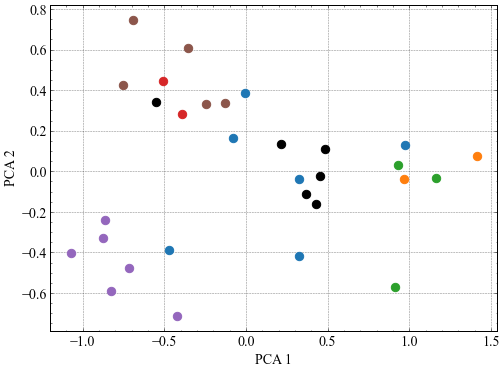

聚类为8类
7    0.200000
1    0.200000
2    0.166667
5    0.133333
4    0.100000
6    0.066667
3    0.066667
0    0.066667
dtype: float64


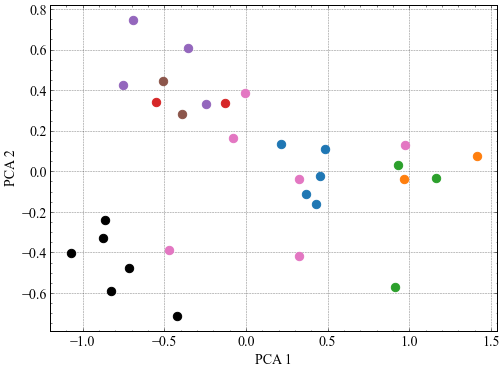

In [68]:
for idx in range(2,9):
    get_ratio(input_n_clusters=idx)